In [1]:
from sklearn import cross_validation, datasets, svm

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [5]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

## C Parameterを変化させつつCross Validation

In [12]:
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

In [14]:
scores = np.array(scores)
scores_std = np.array(scores_std)

(0, 1.1)

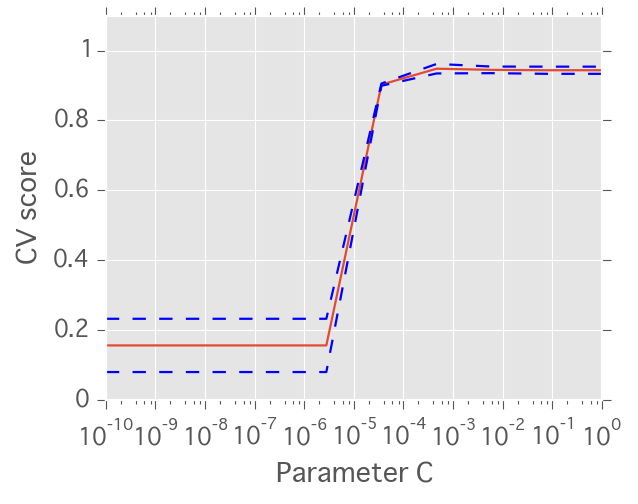

In [16]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, scores + scores_std, 'b--')
plt.semilogx(C_s, scores - scores_std, 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)